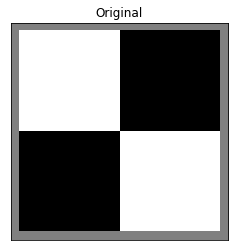

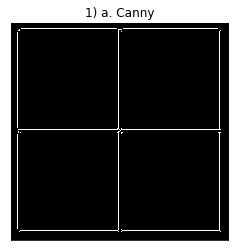

In [1]:
import cv2
import numpy as np
import sys
from skimage.feature import peak_local_max
from matplotlib import pyplot as plt

img = cv2.imread('ps1-input0.png',0)
edges = cv2.Canny(img,100,200,1,7,True)

plt.figure()
plt.imshow(img,cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.imshow(edges,cmap='gray')
plt.title('1) a. Canny'), plt.xticks([]), plt.yticks([])
plt.show()


img=cv2.cvtColor(img, cv2.COLOR_GRAY2BGR); 

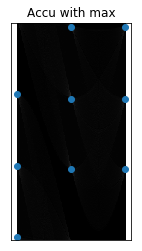

In [2]:
def houghManual(edges,accuracyDrop=1,ticksTheta=1.):
    #accuracyDrop parameter designed to group multiple pixels. New diagonal = 1/accuracyDrop
    #ticksTheta discretization of theta. How many ticks will there be in one degree
    height, width = edges.shape
    diag=np.ceil(np.sqrt((height)**2 + (width)**2)) #we compute the diagonal
    aMax=int((diag)/accuracyDrop) #we take the diagonal and scale it
    bMax=int(180*ticksTheta)+1 #from 0 to pi/2, origin being bottom left corner
    accu=np.zeros((aMax,bMax))
    y_idx, x_idx = np.nonzero(edges) # find all edge (nonzero) pixel indexes

    for i in range(len(x_idx)): # cycle through edge points
        x = x_idx[i]
        y = y_idx[i]
        for j in range(0, bMax): # cycle through thetas and calc rho
            deg=j-90
            rho = int((x * np.cos(np.deg2rad(deg/ticksTheta)) +y * np.sin(np.deg2rad(deg/ticksTheta))))
            accu[int(rho/accuracyDrop), j] += 1
    return accu


accuracyDrop=1
ticksTheta=1.    
accu=houghManual(edges,accuracyDrop,ticksTheta) 
#  find peaks
xy = peak_local_max(accu, min_distance=20,threshold_rel=0.5,exclude_border=0)
x= [item[0] for item in xy]
y= [item[1] for item in xy]
    
plt.figure()
imgplot = plt.imshow(accu,cmap='gray')
plt.title('Accu with max'), plt.xticks([]), plt.yticks([])
plt.scatter(y,x)
plt.show()


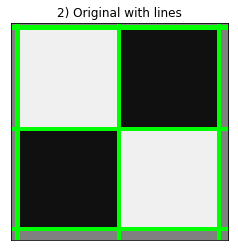

In [3]:
def plotHough(x,y,image,title):
    lineConstant=10000
    height, width = edges.shape
    diag=np.ceil(np.sqrt((height)**2 + (width)**2)) #we compute the diagonal
    for i in range(0,len(x)):
        rho=x[i]
        theta=y[i]-90
        a=np.cos(np.deg2rad(theta/ticksTheta))
        b=np.sin(np.deg2rad(theta/ticksTheta))
        x1Image=int(a*rho*accuracyDrop-lineConstant*b) #x in hough space is rho
        y1Image=int(b*rho*accuracyDrop+lineConstant*a)
        x2Image=int(a*rho*accuracyDrop+lineConstant*b)
        y2Image=int(b*rho*accuracyDrop-lineConstant*a)
        #print('a='+str(a)+' b='+str(b)+' x1='+str(x1Image)+' y1='+str(y1Image)+' x2='+str(x2Image)+' y2='+str(y2Image))
        cv2.line(image,(x1Image,y1Image),(x2Image,y2Image), (0,255,0),3)
    plt.imshow(image)
    plt.title(title), plt.xticks([]), plt.yticks([])
    plt.show()

plotHough(x,y,img,'2) Original with lines')

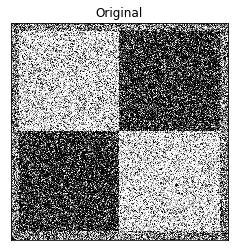

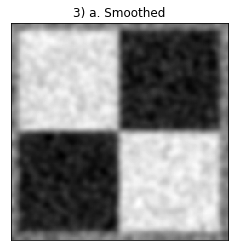

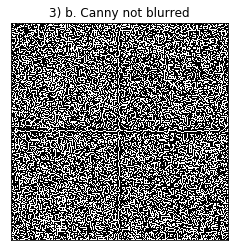

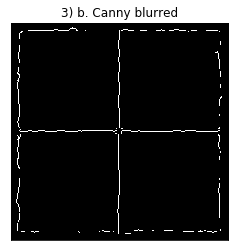

In [4]:
imgNoise = cv2.imread('ps1-input0-noise.png',0)
blur = cv2.GaussianBlur(imgNoise,(19,19),0)
edgesBlurred = cv2.Canny(blur,850,1000,1,5,True)
edgesNoise = cv2.Canny(imgNoise,850,1000,1,5,True)
#The canny process seems to be pivital, as we get a nice image suitable for hough

plt.figure()
plt.imshow(imgNoise,cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.imshow(blur,cmap='gray')
plt.title('3) a. Smoothed'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.imshow(edgesNoise,cmap='gray')
plt.title('3) b. Canny not blurred'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.imshow(edgesBlurred,cmap='gray')
plt.title('3) b. Canny blurred'), plt.xticks([]), plt.yticks([])
plt.show()


imgNoise=cv2.cvtColor(imgNoise, cv2.COLOR_GRAY2BGR); 


In [5]:
accuracyDrop=2#diagonal is reduced by half
ticksTheta=2.#we go from 0.5deg to 0.5
accu=houghManual(edgesBlurred,accuracyDrop,ticksTheta) 



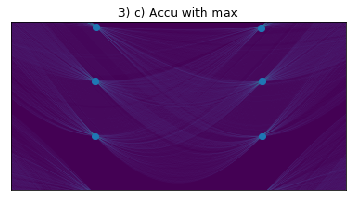

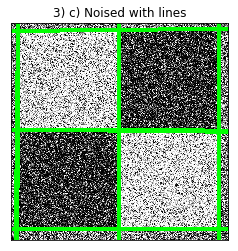

In [6]:
#  find peaks
# Parameters were tuned to best find the edges
xy = peak_local_max(accu, min_distance=5,threshold_rel=0.5,exclude_border=0)
x= [item[0] for item in xy]
y= [item[1] for item in xy]
    
plt.figure()
imgplot = plt.imshow(accu)
plt.title('3) c) Accu with max'), plt.xticks([]), plt.yticks([])
plt.scatter(y,x)
plt.show()

plotHough(x,y,imgNoise,'3) c) Noised with lines')


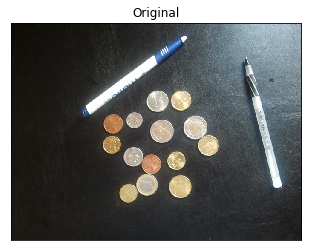

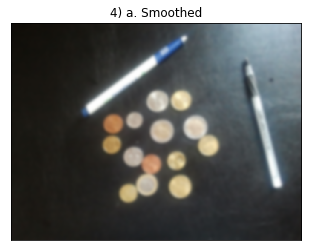

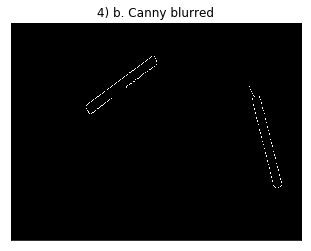

In [23]:
imgNoise = cv2.imread('ps1-input1.jpg')
blur = cv2.GaussianBlur(imgNoise,(19,19),0)
edgesBlurred = cv2.Canny(blur,0,2700,1,5,True)

b,g,r = cv2.split(imgNoise)       # get b,g,r
imgNoiseRgb = cv2.merge([r,g,b])     # switch it to rgb
plt.figure()
plt.imshow(imgNoiseRgb)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

b,g,r = cv2.split(blur)       # get b,g,r
blurRgb = cv2.merge([r,g,b])     # switch it to rgb
plt.figure()
plt.imshow(blurRgb)
plt.title('4) a. Smoothed'), plt.xticks([]), plt.yticks([])
plt.show()


plt.figure()
plt.imshow(edgesBlurred,cmap='gray')
plt.title('4) b. Canny blurred'), plt.xticks([]), plt.yticks([])
plt.show()



In [24]:
accuracyDrop=2#diagonal is reduced by half in hough space
ticksTheta=2.#we go from 0.5deg to 0.5
accu2=houghManual(edgesBlurred,accuracyDrop,ticksTheta) 


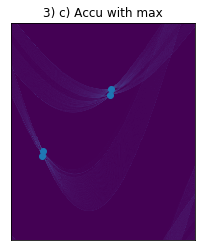

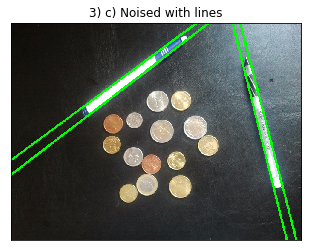

In [28]:
#  find peaks
# Parameters were tunedto best find the edges
xy2 = peak_local_max(accu2, min_distance=5,threshold_rel=0.5,exclude_border=0)
x2= [item[0] for item in xy2]
y2= [item[1] for item in xy2]
    
fig=plt.figure()
imgplot = plt.imshow(accu2)
plt.title('3) c) Accu with max'), plt.xticks([]), plt.yticks([])
plt.scatter(y2,x2)
plt.show()

#fig2 =plt.figure(figsize=(20.0, 10.0))
plotHough(x2,y2,imgNoiseRgb,'3) c) Noised with lines')

#fig2.savefig("fig2.png")

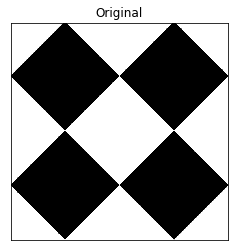

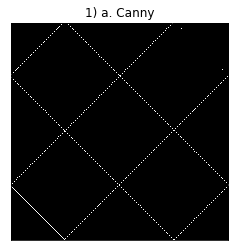

In [10]:
img = cv2.imread('input-test.png',0)
edges = cv2.Canny(img,10,100,1,3,True)

plt.figure()
plt.imshow(img,cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.imshow(edges,cmap='gray')
plt.title('1) a. Canny'), plt.xticks([]), plt.yticks([])
plt.show()


img=cv2.cvtColor(img, cv2.COLOR_GRAY2BGR); 

In [11]:
accuracyDrop=2#diagonal is reduced by half
ticksTheta=2.#we go from 0.5deg to 0.5
accu=houghManual(edges,accuracyDrop,ticksTheta) 


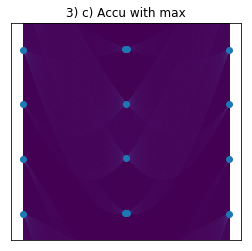

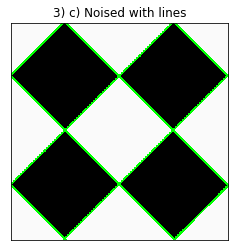

In [12]:
#  find peaks
# Parameters were tunedto best find the edges
xy = peak_local_max(accu, min_distance=5,threshold_rel=0.1,exclude_border=0)
x= [item[0] for item in xy]
y= [item[1] for item in xy]
    
fig=plt.figure()
imgplot = plt.imshow(accu)
plt.title('3) c) Accu with max'), plt.xticks([]), plt.yticks([])
plt.scatter(y,x)
plt.show()

#fig2 =plt.pyplot.figure(figsize=(8.0, 5.0))
plotHough(x,y,img,'3) c) Noised with lines')

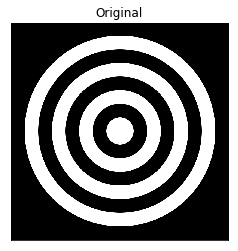

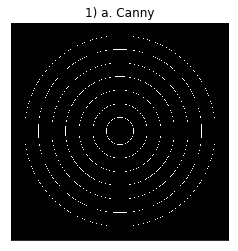

In [13]:
img = cv2.imread('target.png',0)
edges = cv2.Canny(img,0,20,1,3,True)

plt.figure()
plt.imshow(img,cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.imshow(edges,cmap='gray')
plt.title('1) a. Canny'), plt.xticks([]), plt.yticks([])
plt.show()


img=cv2.cvtColor(img, cv2.COLOR_GRAY2BGR); 

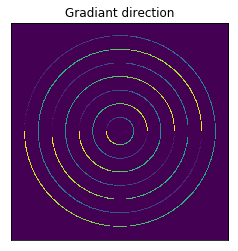

In [14]:
img = cv2.imread('target.png',0)
gxx=cv2.Sobel(img,cv2.CV_32FC1,1,0);
gyy=cv2.Sobel(img,cv2.CV_32FC1,0,1);
thetaTest=cv2.phase(gxx,gyy,angleInDegrees=True);


plt.imshow(thetaTest)
plt.title('Gradiant direction'), plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
def houghCircleManual(edges,image,accuracyDrop=1,radMin=10,radMax=11):
    #accuracyDrop parameter designed to group multiple pixels. New diagonal = 1/accuracyDrop
    #ticksTheta discretization of theta. How many ticks will there be in one degree
    height, width = edges.shape
    aMax=int(width/accuracyDrop)
    bMax=int(height/accuracyDrop)
    
    radSize=int((radMax-radMin))+1
    
    gxx=cv2.Sobel(image,cv2.CV_32FC1,1,0);
    gyy=cv2.Sobel(image,cv2.CV_32FC1,0,1);
    thetaArray=cv2.phase(gxx,gyy);
    
    accu=np.zeros((aMax,bMax,radSize))
    y_idx, x_idx = np.nonzero(edges) # find all edge (nonzero) pixel indexes

    for i in range(len(x_idx)): # cycle through edge points
        x = x_idx[i]
        y = y_idx[i]
        for j in range(0, radSize): # cycle through thetas and calc rho
            rad=radMin+j
            theta=thetaArray[y,x]
            a=int(int(x-rad*np.cos(theta))/accuracyDrop)
            b=int(int(y-rad*np.sin(theta))/accuracyDrop)
            #print('a='+str(a)+' b='+str(b)+' rad='+str(rad))
            if(a<aMax and b<bMax):
                accu[a,b,int(rad-radMin)] += 1
    return accu

radMin=10
radMax=400
accuracyDrop=1
accu=houghCircleManual(edges,img,accuracyDrop,radMin,radMax) 



In [16]:
#  find peaks
xyr = peak_local_max(accu, min_distance=20,threshold_rel=0.7,exclude_border=0)
x= [item[0] for item in xyr]
y= [item[1] for item in xyr]
r= [item[2] for item in xyr]
print(xyr)

[[399 399 290]
 [399 399 190]
 [399 399  90]]


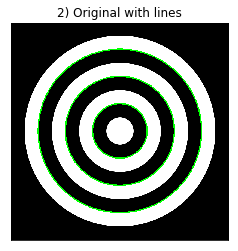

In [17]:
def plotHoughCircle(x,y,r,image,title,radMin,radMax):
    height, width = edges.shape
    diag=np.ceil(np.sqrt((height)**2 + (width)**2)) #we compute the diagonal
    for i in range(0,len(x)):      
        #print('a='+str(a)+' b='+str(b)+' x1='+str(x1Image)+' y1='+str(y1Image)+' x2='+str(x2Image)+' y2='+str(y2Image))
        cv2.circle(image,(x[i]*accuracyDrop,y[i]*accuracyDrop),r[i]+radMin, color=(0,255,0),thickness=3)
    plt.imshow(image)
    plt.title(title), plt.xticks([]), plt.yticks([])
    plt.show()

img = cv2.imread('target.png',0)
img=cv2.cvtColor(img, cv2.COLOR_GRAY2BGR); 
plotHoughCircle(x,y,r,img,'2) Original with lines',radMin,radMax)